In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

# **Acceso a Internet**

A continuación, cargamos, exploramos y analizamos los datasets proporcionados por [ENACOM](https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/) y guardadas en la carpeta [Original datasets](https://github.com/PedroLiLL/Telecommunications-Data-Analysis/tree/main/Original%20datasets) correspondientes a la información del mercado, oferta, demanda y cobertura del servicio de internet (Primer Trimestre 2014 - Tercer Trimestre 2022)

## Penetración de Internet fijo (accesos por cada 100 hogares) **`penetracion_hogar_prov`**

Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia

In [111]:
penetracion_hogar_prov = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/1-Internet_Penetracion.csv')
penetracion_hogar_prov

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
...,...,...,...,...
859,2014,1,Santa Cruz,"28,94"
860,2014,1,Santa Fe,"47,85"
861,2014,1,Santiago Del Estero,"16,31"
862,2014,1,Tierra Del Fuego,"63,97"


Mostramos la información del dataframe

In [112]:
penetracion_hogar_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


La columna **Accesos por cada 100 hogares** es de tipo cadena cuando debe ser de tipo numérico

In [113]:
# Reemplazamos las comas por puntos para que el método de conversión no encuentre errores
penetracion_hogar_prov['Accesos por cada 100 hogares'] = penetracion_hogar_prov['Accesos por cada 100 hogares'].str.replace(',', '.')
# Convertimos la columna a numérico
penetracion_hogar_prov['Accesos por cada 100 hogares'] = pd.to_numeric(penetracion_hogar_prov['Accesos por cada 100 hogares'])
# Mostramos la información actualizada del dataframe
penetracion_hogar_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


Verificamos las provincias

In [114]:
penetracion_hogar_prov['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

Resumen estadístico

In [115]:
penetracion_hogar_prov.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,49.620301
std,2.583484,1.118682,23.319150
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.750000,32.220000
50%,2018.000000,2.500000,46.390000
75%,2020.000000,3.250000,62.442500
max,2022.000000,4.000000,124.060000


**Observaciones**

- La media de accesos por cada 100 hogares es de 49.62, lo que indica que hay menos de 50 accesos a internet (en promedio) en Argentina.
- El valor mínimo de Accesos es 9.35 lo que indica lo que indica que existen provincias con una penetración de internet muy baja. Al mismo tiempo, observamos que el valor máximo es de 124.06, lo que indica que hay algunas provincias con muy alta penetración de internet por hogares.

**Análisis**

A continuación, observaremos algunas visualizaciones para explorar el dataframe con más detalle

1. Distribución de **Accesos por cada 100 hogares**

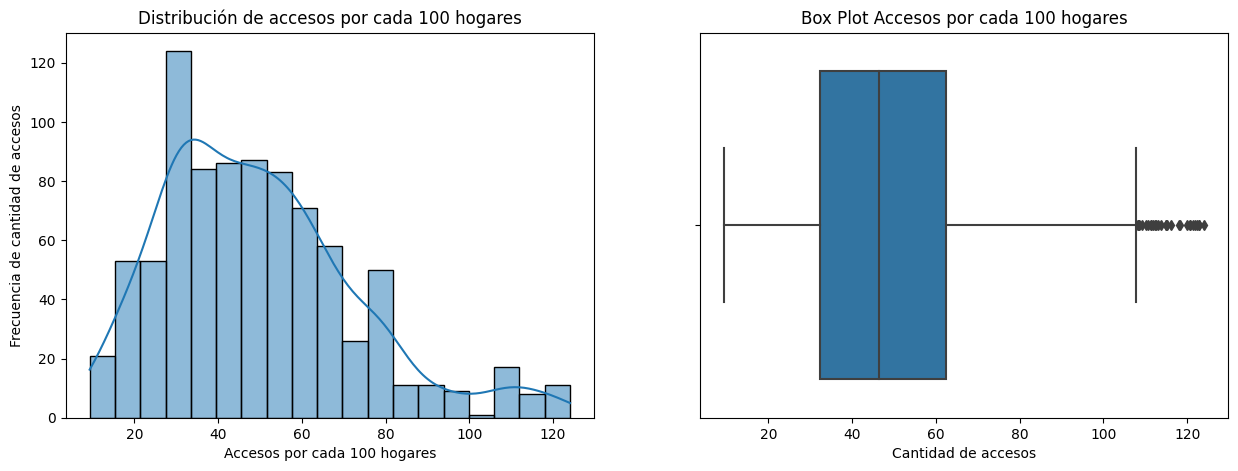

In [116]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# Histograma
sns.histplot(x=penetracion_hogar_prov['Accesos por cada 100 hogares'], kde=True, ax=ax1)
ax1.set_title('Distribución de accesos por cada 100 hogares')
ax1.set_ylabel('Frecuencia de cantidad de accesos')
ax1.set_xlabel('Accesos por cada 100 hogares')

#box plot de los accesos por cada 100 hogares
sns.boxplot(x=penetracion_hogar_prov['Accesos por cada 100 hogares'], ax=ax2)
ax2.set_title('Box Plot Accesos por cada 100 hogares')
ax2.set_xlabel('Cantidad de accesos')

plt.show()

**Observaciones**
- La distribución de **Accesos por cada 100 hogares** está sesgada hacia la derecha, lo que indica que hay que gran parte de las provincias tienen una baja penetración de acceso a internet.

2. **Accesos por cada 100 hogares** vs **Provincias**

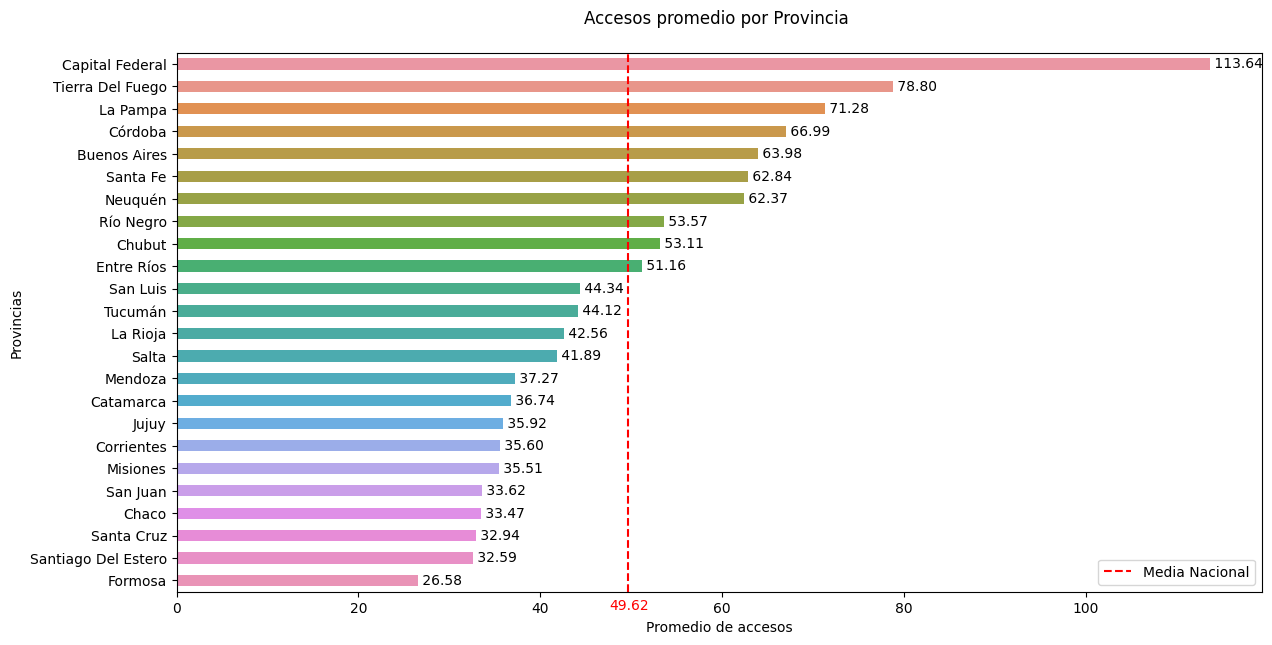

In [117]:
# Agrupamos el dataframe respecto a las provincias
accesos_por_provincia = penetracion_hogar_prov.groupby(by='Provincia')['Accesos por cada 100 hogares'].mean().sort_values(ascending=False)
# Sacamos el promedio general
promedio_general = penetracion_hogar_prov['Accesos por cada 100 hogares'].mean()

# Gráfico de barras de accesos promedios
plt.figure(figsize=(14,7))
plt.title('Accesos promedio por Provincia \n')
sns.barplot(y=accesos_por_provincia.index, x=accesos_por_provincia, width=0.5)
plt.xlabel("Promedio de accesos")
plt.ylabel("Provincias")
# Agregamos los valores promedio a cada barra
for i, value in enumerate(accesos_por_provincia):
    plt.text(value, i, f' {value:.2f}', ha='left', va='center')

# Agregamos una barra vertical con el promedio general
plt.axvline(x=promedio_general, color="red", linestyle="--", label="Media Nacional")
plt.text(promedio_general - 2, len(accesos_por_provincia) + 0.3, f'{promedio_general:.2f}', color='red')

plt.legend()

plt.show()

**Observaciones**
- La Capital Federal tiene, por mucha diferencia, el mayor promedio de acceso a internet por cada 100 hogares, con 113.64 accesos por cada 100 hogares. Le siguen las provincias de Tierra del Fuego y La Pampa con 78.80 y 71.28 respectivamente.
- La provincia de Formosa tiene el menor promedio de acceso a internet por cada 100 hogares, con 26.58 accesos por cada 100 hogares.
- El gráfico muestra una gran variabilidad en la cantidad promedio de acceso entre las diferentes provincias.

3. **Accesos por cada 100 hogares** vs **Año**

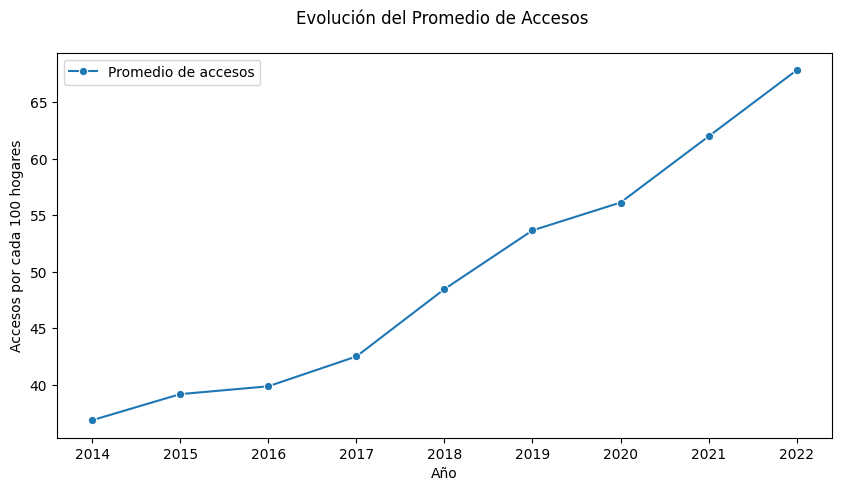

In [118]:
# agrupamos por año y promedio de accesos
accesos_por_año = penetracion_hogar_prov.groupby('Año')['Accesos por cada 100 hogares'].mean().sort_index()

# gráfico de línea de evolución del promedio de accesos por año
plt.figure(figsize=(10,5))
sns.lineplot(x=accesos_por_año.index, y=accesos_por_año, label= 'Promedio de accesos', marker='o')
plt.title("Evolución del Promedio de Accesos \n")
plt.show()

**Observaciones**

- Se observa que hay una ligera disminución en la cantidad promedio desde 2019 a 2020.
- De 2020 a 2021 se observa un incremento en la cantidad promedio de accesos por cada 100 hogares. Este aumento puede estar relacionado con la pandemia COVID-19 y la rápida transición hacia el trabajo remoto, con la implementación de éste último, las clases y eventos virtuales se debe haber disparado la demanda de internet para los hogares.
- La evolución desde el año 2020 a 2021 también no fue tan brusca a pesar de la transición al trabajo remoto, esto se puede deber a las dificultades de muchas personas para acceder a internet debido a la pérdida de empleos tradicionales, la falta de recursos, entre otros.

## Penetración por hogares nacional de Internet fijo **`penetracion_internet_fijo`**

Serie trimestral de la penetración del Internet fijo en la métrica por cada 100 hogares

In [124]:
penetracion_internet_fijo = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/2-Internet_Penetracion.csv')
penetracion_internet_fijo.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021


In [131]:
penetracion_internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           36 non-null     int64 
 1   Trimestre                     36 non-null     int64 
 2   Accesos por cada 100 hogares  36 non-null     object
 3   Accesos por cada 100 hab      36 non-null     object
 4   Periodo                       36 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


Cambiamos los tipos de datos de las columnas **Accesos por cada 100 hogares** y **Accesos por cada 100 hab**

In [132]:
# Reemplazamos las comas por puntos para que el método de conversión no encuentre errores
penetracion_internet_fijo['Accesos por cada 100 hogares'] = penetracion_internet_fijo['Accesos por cada 100 hogares'].str.replace(',', '.')
penetracion_internet_fijo['Accesos por cada 100 hab'] = penetracion_internet_fijo['Accesos por cada 100 hab'].str.replace(',', '.')

# Convertimos la columna a numérico
penetracion_internet_fijo['Accesos por cada 100 hogares'] = pd.to_numeric(penetracion_internet_fijo['Accesos por cada 100 hogares'])
penetracion_internet_fijo['Accesos por cada 100 hab'] = pd.to_numeric(penetracion_internet_fijo['Accesos por cada 100 hab'])

#mostramos la información actualizada
penetracion_internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           36 non-null     int64  
 1   Trimestre                     36 non-null     int64  
 2   Accesos por cada 100 hogares  36 non-null     float64
 3   Accesos por cada 100 hab      36 non-null     float64
 4   Periodo                       36 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


Resumen estadístico

In [134]:
penetracion_internet_fijo.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,60.745833,18.760278
std,2.618615,1.133893,8.513140,2.782531
min,2014.000000,1.000000,49.550000,15.050000
25%,2016.000000,1.750000,53.162500,16.307500
50%,2018.000000,2.500000,59.925000,18.485000
75%,2020.000000,3.250000,66.637500,20.695000
max,2022.000000,4.000000,77.210000,24.150000


**Análisis**

1. **Accesos por cada 100 hogares** y **Accesos por cada 100 hab**

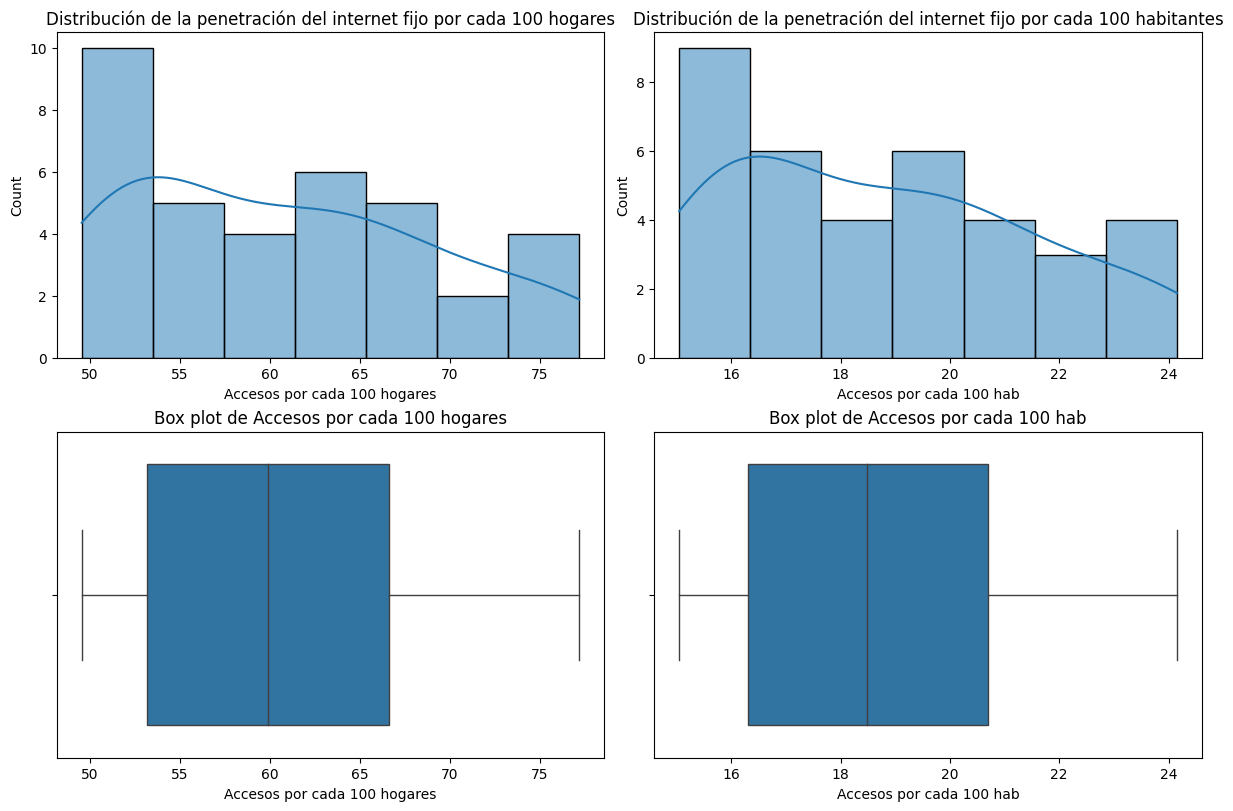

In [135]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8), constrained_layout = True)

# Histograma y boxplot de la columna 'Accesos por cada 100 hogares'
sns.histplot(data = penetracion_internet_fijo, x = 'Accesos por cada 100 hogares', kde = True, ax = axes[0,0])
ax = axes[0,0].set_title('Distribución de la penetración del internet fijo por cada 100 hogares')
sns.boxplot(data = penetracion_internet_fijo, x='Accesos por cada 100 hogares', linewidth = 1, ax = axes[1,0])
axes[1,0].set_title('Box plot de Accesos por cada 100 hogares')
# Histograma y boxplot de la columna 'Accesos por cada 100 hab'
sns.histplot(data = penetracion_internet_fijo, x='Accesos por cada 100 hab', kde = True, ax = axes[0,1])
axes[0,1].set_title('Distribución de la penetración del internet fijo por cada 100 habitantes')
sns.boxplot(data = penetracion_internet_fijo, x='Accesos por cada 100 hab', linewidth = 1, ax = axes[1,1])
axes[1,1].set_title('Box plot de Accesos por cada 100 hab')

# Mostrar grafico completo
plt.show()

## Accesos a Internet fijo por tecnología y localidad **`internet_por_tech_loc`**
Número de accesos al servicio de Internet fijo por tecnología en cada localidad declarada

In [119]:
internet_por_tech_loc = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/14-Accesos_a_Internet_fijo_por_tecnologia_y_localidad.csv')
internet_por_tech_loc

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,"4,54",- 0,3,- 0,852,- 0,706,"6,98",NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,"1,28",NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,- 0,31,- 0,"3,73",- 0,- 0,- 0,- 0,"3,76",NaN
3133,TUCUMAN,Trancas,San Pedro de Colalao,90112020,- 0,- 0,- 0,- 0,- 0,- 0,- 0,313,313,NaN
3134,TUCUMAN,Trancas,Villa de Trancas,90112030,126,- 0,- 0,- 0,33,- 0,- 0,101,260,NaN
3135,TUCUMAN,Yerba Buena,Villa Carmela,90119020,"1,5",- 0,- 0,- 0,1,- 0,- 0,97,"1,6",NaN


Eliminamos la última columna

In [4]:
internet_por_tech_loc = internet_por_tech_loc.iloc[:, 0:13]
internet_por_tech_loc.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,"4,54",- 0,3,- 0,852,- 0,706,"6,98"
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,"1,28"
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6


Reemplazamos valores

In [5]:
# Para las columnas a partir de la quinta, eliminamos los guiones, y las comas lo reemplazamos por puntos

for columna in internet_por_tech_loc.columns[4:]:
    internet_por_tech_loc[columna] = internet_por_tech_loc[columna].str.replace('- ', '')
    internet_por_tech_loc[columna] = internet_por_tech_loc[columna].str.replace(',', '.')

internet_por_tech_loc.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4.54,0,3,0,852,0,706,6.98
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1.28
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


Cambiamos el tipo de dato

In [6]:
for columna in internet_por_tech_loc.columns[4:]:
    internet_por_tech_loc[columna] =pd.to_numeric(internet_por_tech_loc[columna], errors='coerce').fillna(0)

internet_por_tech_loc.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874.0,4.54,0.0,3.0,0.0,852,0,706.0,6.98
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181.0,0.00,0.0,0.0,10.0,1,0,0.0,192.00
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.00,0.0,0.0,0.0,0,0,181.0,181.00
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0.0,782.00,0.0,6.0,167.0,0,0,327.0,1.28
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0.0,0.00,0.0,0.0,0.0,0,0,6.0,6.00


In [7]:
internet_por_tech_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           3137 non-null   float64
 5   CABLEMODEM     3137 non-null   float64
 6   DIAL UP        3137 non-null   float64
 7   FIBRA OPTICA   3137 non-null   float64
 8   OTROS          3137 non-null   float64
 9   SATELITAL      3137 non-null   int64  
 10  WIMAX          3137 non-null   int64  
 11  WIRELESS       3137 non-null   float64
 12  Total general  3137 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 318.7+ KB


Verificamos la columna **Provincia**

In [8]:
internet_por_tech_loc['Provincia'].unique()

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

## **`internet_por_vel_prov`**
Número de accesos al servicio de Internet fijo por velocidad de bajada en cada provincia

In [121]:
internet_por_vel_prov = pd.read_csv('../Telecommunications-Data-Analysis/Original datasets/11-Accesos_a_Internet_fijo_por_velocidad_de_bajada_y_provincia.csv')
internet_por_vel_prov

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
0,2022.0,4.0,Buenos Aires,97.634,18,- 0,- 0,28.724,192,4.611,...,- 0,- 0,14,- 0,- 0,- 0,5.655,- 0,90.796,- 0
1,2022.0,4.0,Capital Federal,106.772,31,- 0,- 0,451.000,34,1.307,...,- 0,- 0,- 0,1,- 0,- 0,15,- 0,28.406,- 0
2,2022.0,4.0,Catamarca,2.280,- 0,- 0,- 0,34.000,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,4.0,Chaco,3.909,- 0,225,111,234.000,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,4.0,Chubut,20.026,8,- 0,- 0,69.000,32,836,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2017.0,4.0,Santa Fe,14.119,- 0,- 0,- 0,3.109,- 0,7.637,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
501,2017.0,4.0,Santiago Del Estero,- 0,- 0,- 0,- 0,41.000,- 0,909,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
502,2017.0,4.0,Tierra Del Fuego,- 0,- 0,- 0,- 0,6.000,- 0,282,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
503,2017.0,4.0,Tucumán,- 0,- 0,- 0,- 0,105.000,- 0,1,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


Eliminamos valores nulos

In [10]:
internet_por_vel_prov.dropna(inplace=True)

In [11]:
# Se observa la información de cada columna
internet_por_vel_prov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 503
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         504 non-null    float64
 1   Trimestre   504 non-null    float64
 2   Provincia   504 non-null    object 
 3   Otros       504 non-null    object 
 4   0,256 Mbps  504 non-null    object 
 5   0,375 Mbps  504 non-null    object 
 6   0,625 Mbps  504 non-null    object 
 7   0,5 Mbps    504 non-null    float64
 8   0,512 Mbps  504 non-null    object 
 9   0,75 Mbps   504 non-null    object 
 10  1 Mbps      504 non-null    object 
 11  1,2 Mbps    504 non-null    object 
 12  1,25 Mbps   504 non-null    object 
 13  1,5 Mbps    504 non-null    object 
 14  2 Mbps      504 non-null    object 
 15  2,2 Mbps    504 non-null    object 
 16  2,5 Mbps    504 non-null    object 
 17  6,7 Mbps    504 non-null    object 
 18  3 Mbps      504 non-null    float64
 19  3,2 Mbps    504 non-null    object

Según la información de la tabla, las columnas **Año** y **Trimestre** son de tipo flotante cuando deben ser de tipo entero. Las columnas de tipos de servicios son de tipo str con tipos flotantes entre ellos. Así que transformamos todos estos tipos de datos mencionados.

In [12]:
# transformamos las columnas Año y Trimestre a entero
internet_por_vel_prov['Año'] = internet_por_vel_prov['Año'].astype(int)
internet_por_vel_prov['Trimestre'] = internet_por_vel_prov['Trimestre'].astype(int)

In [13]:
# Para las columnas; a partir de la cuarta, eliminamos los guiones, y las comas lo reemplazamos por puntos; en aquellas columnas de tipo str
for columna in internet_por_vel_prov.columns[3:]:
    if internet_por_vel_prov[columna].dtype == object:
        internet_por_vel_prov[columna] = internet_por_vel_prov[columna].str.replace('- ', '')
        internet_por_vel_prov[columna] = internet_por_vel_prov[columna].str.replace(',', '.')

In [14]:
# Transformamos las columnas anteriores a tipo numerico
for columna in internet_por_vel_prov.columns[3:]:
    internet_por_vel_prov[columna] =pd.to_numeric(internet_por_vel_prov[columna], errors='coerce').fillna(0)

internet_por_vel_prov.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
0,2022,4,Buenos Aires,97.634,18,0,0,28.724,192,4.611,...,0,0,14,0,0,0,5.655,0,90.796,0
1,2022,4,Capital Federal,106.772,31,0,0,451.000,34,1.307,...,0,0,0,1,0,0,15.000,0,28.406,0
2,2022,4,Catamarca,2.280,0,0,0,34.000,37,0.000,...,0,0,0,0,0,0,0.000,0,0.000,0
3,2022,4,Chaco,3.909,0,225,111,234.000,2,0.000,...,0,0,0,0,0,0,0.000,0,0.000,0
4,2022,4,Chubut,20.026,8,0,0,69.000,32,836.000,...,0,0,0,0,0,0,0.000,0,0.000,0


In [15]:
internet_por_vel_prov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 503
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         504 non-null    int32  
 1   Trimestre   504 non-null    int32  
 2   Provincia   504 non-null    object 
 3   Otros       504 non-null    float64
 4   0,256 Mbps  504 non-null    int64  
 5   0,375 Mbps  504 non-null    int64  
 6   0,625 Mbps  504 non-null    int64  
 7   0,5 Mbps    504 non-null    float64
 8   0,512 Mbps  504 non-null    int64  
 9   0,75 Mbps   504 non-null    float64
 10  1 Mbps      504 non-null    float64
 11  1,2 Mbps    504 non-null    int64  
 12  1,25 Mbps   504 non-null    int64  
 13  1,5 Mbps    504 non-null    float64
 14  2 Mbps      504 non-null    float64
 15  2,2 Mbps    504 non-null    int64  
 16  2,5 Mbps    504 non-null    float64
 17  6,7 Mbps    504 non-null    int64  
 18  3 Mbps      504 non-null    float64
 19  3,2 Mbps    504 non-null    int64 

Verificamos la columna **Provincia**

In [16]:
internet_por_vel_prov['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)